In [1]:
## https://www.quantstart.com/articles/hidden-markov-models-for-regime-detection-using-r/
library('depmixS4')
library('quantmod')
set.seed(1)

Loading required package: nnet
Loading required package: MASS
Warning message:
“package ‘MASS’ was built under R version 3.6.2”Loading required package: Rsolnp
Loading required package: nlme
Warning message:
“package ‘nlme’ was built under R version 3.6.2”Loading required package: xts
Warning message:
“package ‘xts’ was built under R version 3.6.2”Loading required package: zoo
Warning message:
“package ‘zoo’ was built under R version 3.6.2”
Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: TTR
Warning message:
“package ‘TTR’ was built under R version 3.6.2”Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.


In [2]:
# Create the parameters for the bull and
# bear market returns distributions
Nk_lower <- 50
Nk_upper <- 150
bull_mean <- 0.1
bull_var <- 0.1
bear_mean <- -0.05
bear_var <- 0.2

In [6]:
# Create the list of durations (in days) for each regime
days <- replicate(5, sample(Nk_lower:Nk_upper, 1))
days

[1]  56 122 128 134  86

In [7]:
# Create the various bull and bear markets returns
market_bull_1 <- rnorm( days[1], bull_mean, bull_var ) 
market_bear_2 <- rnorm( days[2], bear_mean, bear_var ) 
market_bull_3 <- rnorm( days[3], bull_mean, bull_var ) 
market_bear_4 <- rnorm( days[4], bear_mean, bear_var ) 
market_bull_5 <- rnorm( days[5], bull_mean, bull_var )

In [8]:
# Create the list of true regime states and full returns list
true_regimes <- c( rep(1,days[1]), rep(2,days[2]), rep(1,days[3]), rep(2,days[4]), rep(1,days[5]))
returns <- c( market_bull_1, market_bear_2, market_bull_3, market_bear_4, market_bull_5)

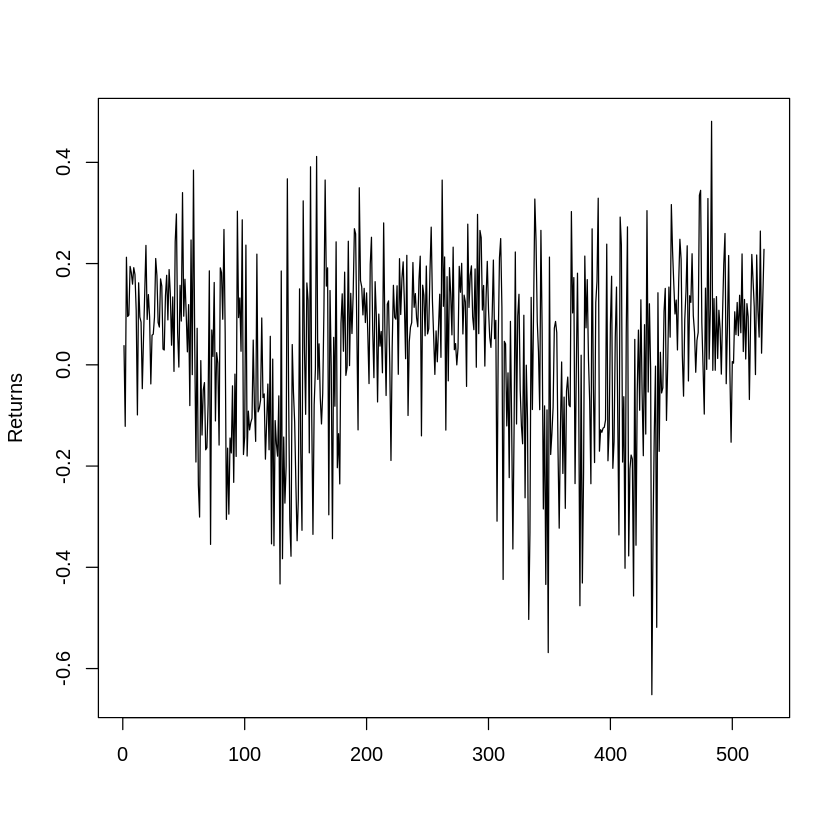

In [9]:
plot(returns, type="l", xlab='', ylab="Returns") 

In [11]:
# Create and fit the Hidden Markov Model
hmm <- depmix(returns ~ 1, family = gaussian(), nstates = 2, data=data.frame(returns=returns))
hmmfit <- fit(hmm, verbose = FALSE)

converged at iteration 27 with logLik: 263.9614 


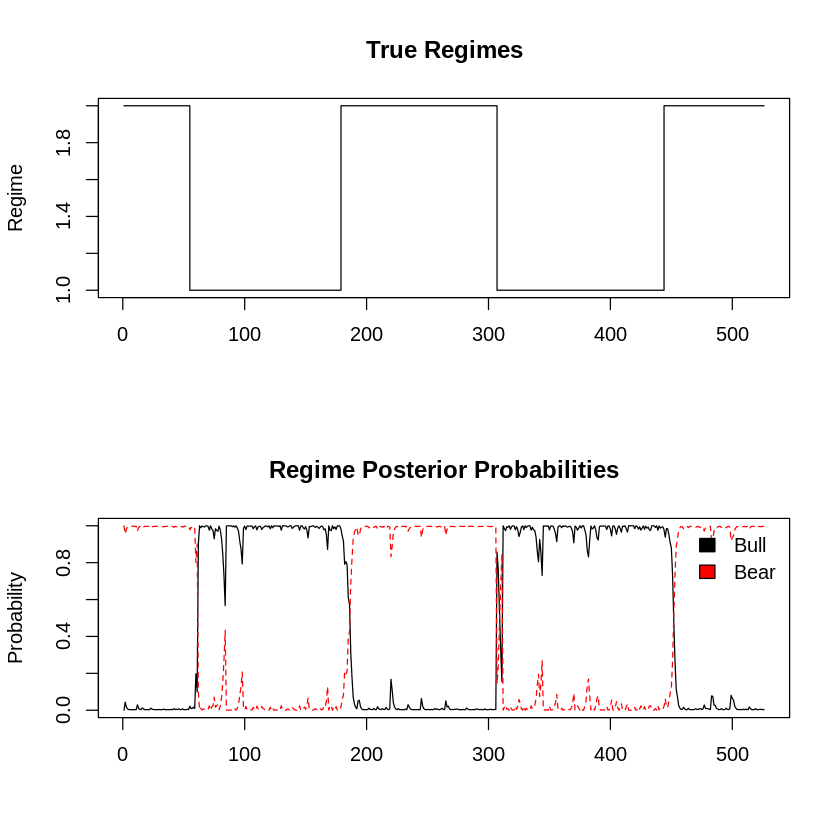

In [12]:
# Output both the true regimes and the 
# posterior probabilities of the regimes
post_probs <- posterior(hmmfit)
layout(1:2)
plot(post_probs$state, type='s', main='True Regimes', xlab='', ylab='Regime')
matplot(post_probs[,-1], type='l', main='Regime Posterior Probabilities', ylab='Probability')
legend(x='topright', c('Bull','Bear'), fill=1:2, bty='n')

In [17]:
# Obtain S&P500 data from 2004 onwards and
# create the returns stream from this
getSymbols( "^GSPC", from="2004-01-01" )
gspcRets = diff( log( Cl( GSPC ) ) )
returns = as.numeric(gspcRets)

Warning message:
“'indexClass<-' is deprecated.
Use 'tclass<-' instead.
See help("Deprecated") and help("xts-deprecated").”

[1] "^GSPC"

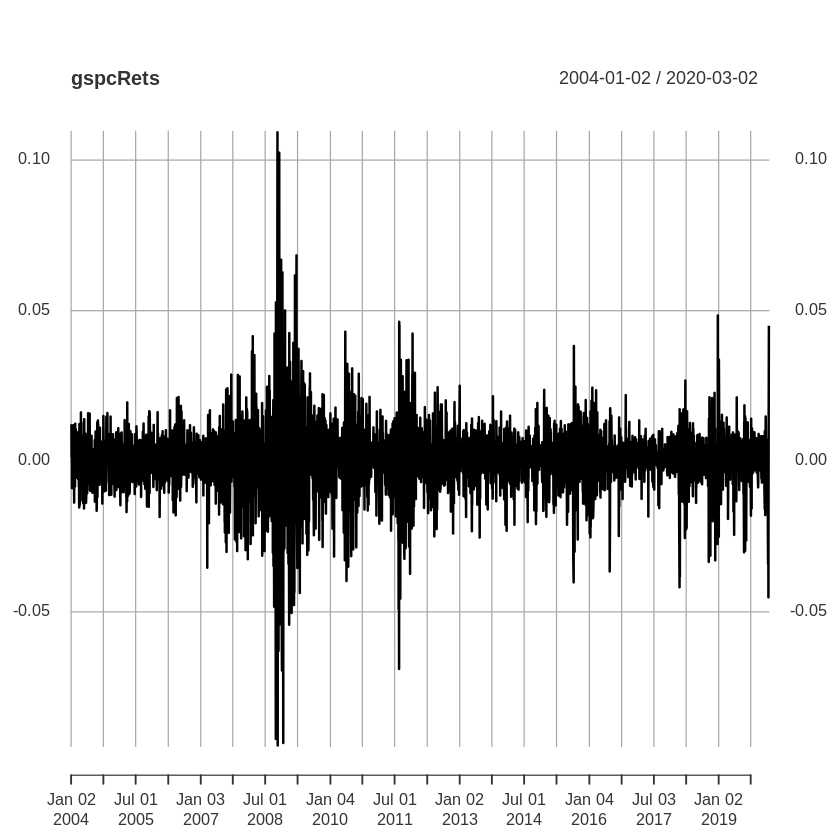

In [18]:
plot(gspcRets)

converged at iteration 41 with logLik: 13414.26 


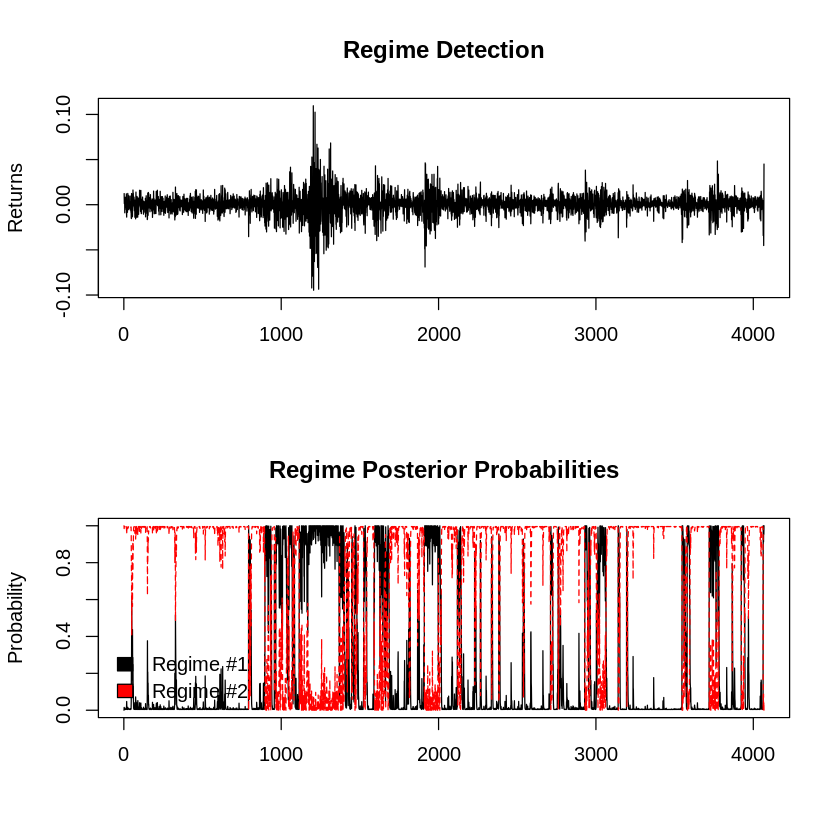

In [19]:
# Fit a Hidden Markov Model with two states 
# to the S&P500 returns stream
hmm <- depmix(returns ~ 1, family = gaussian(), nstates = 2, data=data.frame(returns=returns))
hmmfit <- fit(hmm, verbose = FALSE)
post_probs <- posterior(hmmfit)

# Plot the returns stream and the posterior
# probabilities of the separate regimes
layout(1:2)
plot(returns, type='l', main='Regime Detection', xlab='', ylab='Returns')
matplot(post_probs[,-1], type='l', main='Regime Posterior Probabilities', ylab='Probability')
legend(x='bottomleft', c('Regime #1','Regime #2'), fill=1:2, bty='n')

converged at iteration 114 with logLik: 13597.44 


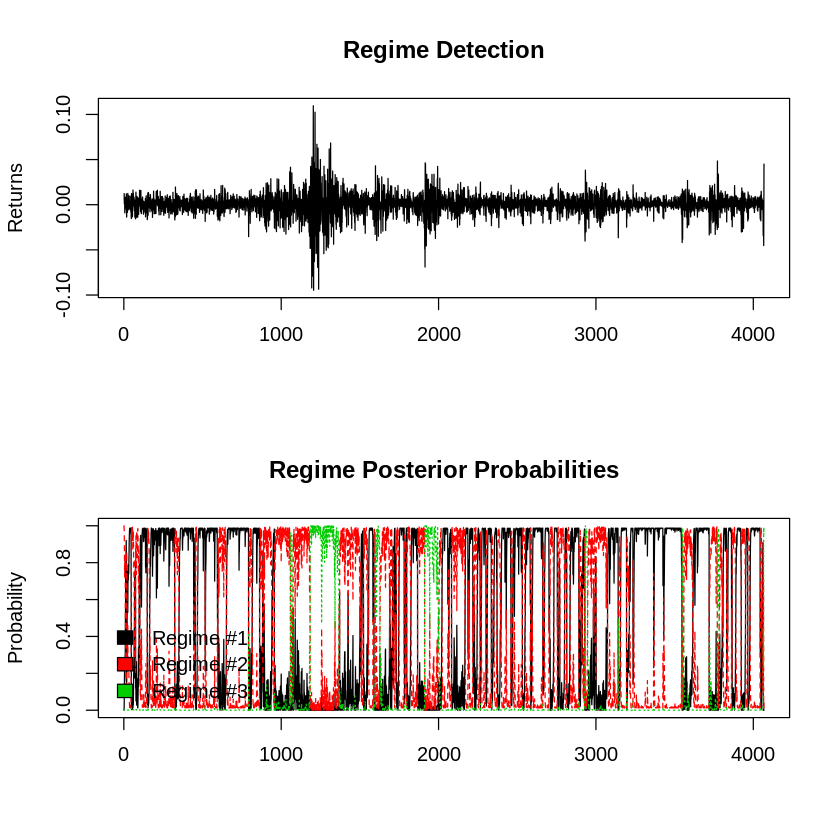

In [20]:
# Fit a Hidden Markov Model with three states 
# to the S&P500 returns stream
hmm <- depmix(returns ~ 1, family = gaussian(), nstates = 3, data=data.frame(returns=returns))
hmmfit <- fit(hmm, verbose = FALSE)
post_probs <- posterior(hmmfit)
 
# Plot the returns stream and the posterior
# probabilities of the separate regimes
layout(1:2)
plot(returns, type='l', main='Regime Detection', xlab='', ylab='Returns')
matplot(post_probs[,-1], type='l', main='Regime Posterior Probabilities', ylab='Probability')
legend(x='bottomleft', c('Regime #1','Regime #2', 'Regime #3'), fill=1:3, bty='n')